In [3]:
import os
print(os.getcwd())
currentPath = os.getcwd().split('/')

indexOf = currentPath.index('workspace')
rootPath = '/'.join(currentPath[:indexOf+1])+'/CDCGAN'
os.chdir(rootPath)
root = os.getcwd()

print(root)

/workspace/CDCGAN
/workspace/CDCGAN


In [4]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms as T
import packages.arquitectures.CDCGAN as GanMannager
from packages.dataHandlers.datasetMannager import datasetMannager

In [5]:
gan = False
DATASET_NAME = 'LETTERS'
params = {
    'optimizer': 'adam',
    'learning_rate': 0.0007969, 'betas_min': 0.4216, 'betas_max': 0.9755,
}

explorationName = "_final"
# experimentName = "c0gqop9g"
experimentName = "7t5v93s7" 
# experimentName = "6ziudbfm"  # Z_SIZE = 250
modelName = 'model_run_'+experimentName

Z_SIZE = 100
IMG_SIZE = 28
IMG_CHANNELS = 1
BATCH_SIZE = 128

transform = T.Compose([
    T.Resize(IMG_SIZE),
    T.Grayscale(num_output_channels=IMG_CHANNELS),
    T.ToTensor(),
    T.Normalize([0.5], [0.5]),
])

dataMannager = datasetMannager(transform, BATCH_SIZE, DATASET_NAME)
data_module = dataMannager.getDataModule()
DATALOADER = data_module.getTrainDataLoader()
UNIQUE_LABELS = data_module.getUniqueLabels()
LABELS_COUNT = UNIQUE_LABELS.shape[0]

gan = GanMannager.CDCGAN(isDebugMode=False,root=root)
gan.setDataLoader(DATALOADER, DATASET_NAME)
gan.setImageParams(BATCH_SIZE, IMG_CHANNELS, IMG_SIZE, UNIQUE_LABELS, LABELS_COUNT)
gan.setFixedSpace(Z_SIZE, LABELS_COUNT*LABELS_COUNT, LABELS_COUNT)
gan.setupModels(params)

#### Discriminator for 28x28 ####
#### Generator for 28x28 ####


In [6]:
gan.loadModel(explorationName, experimentName, modelName)

In [7]:
sentence = 'hola mundo'.split(' ')

In [8]:
max_height = 44
words_img = []
transform = T.ToPILImage()

for i in range(len(sentence)):
    word = sentence[i]
    x_offset = 0
    word_width = len(word)*22
    word_img = Image.new('RGB', (word_width, max_height))

    for letter in word:
        img, label = gan.generateImage(data_module.getLabelIndex(letter))
        img_numpy = img.detach().cpu()[0].permute(0,1,2)#[12:56,22:44]
        img_PIL = transform(img.detach().cpu()[0])
        img_PIL = img_PIL.crop((22,12,44,56))
        word_img.paste(img_PIL, (x_offset,0))
        x_offset += img_PIL.size[0]

    words_img.append(word_img)

    blank_img= transform(torch.zeros((64,64)))
    blank_img = blank_img.crop((22,12,44,56))

    # word_img.show()
    if (i< len(sentence) -1): words_img.append(blank_img)

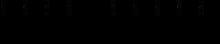

In [9]:
x_offset = 0
final_img = Image.new('RGB', (sum([img.size[0] for img in words_img]), max_height))
for img in words_img:
    final_img.paste(img, (x_offset,0))
    x_offset += img.size[0]

final_img.show()
final_img.save('word_'+experimentName+'.jpg')